**Firstly let's import packages.**

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import array as arr

**Adding CSV files Deliveries and Matches**

In [10]:
deliveries = pd.read_csv('/content/deliveries.csv')
matches = pd.read_csv('/content/matches.csv')

**Parse and Preprocess the Data**

In [11]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1.0,Sunrisers Hyderabad,Royal Challengers Bangalore,1.0,1.0,DA Warner,S Dhawan,TS Mills,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
1,1,1.0,Sunrisers Hyderabad,Royal Challengers Bangalore,1.0,2.0,DA Warner,S Dhawan,TS Mills,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
2,1,1.0,Sunrisers Hyderabad,Royal Challengers Bangalore,1.0,3.0,DA Warner,S Dhawan,TS Mills,0.0,...,0.0,0.0,0.0,0.0,4.0,0.0,4.0,NaN,NaN,NaN
3,1,1.0,Sunrisers Hyderabad,Royal Challengers Bangalore,1.0,4.0,DA Warner,S Dhawan,TS Mills,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
4,1,1.0,Sunrisers Hyderabad,Royal Challengers Bangalore,1.0,5.0,DA Warner,S Dhawan,TS Mills,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,2.0,NaN,NaN,NaN


In [12]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


**Data that contains - null values**

In [13]:
deliveries.isnull().sum()

match_id                0
inning                  1
batting_team            1
bowling_team            1
over                    1
ball                    1
batsman                 1
non_striker             1
bowler                  1
is_super_over           1
wide_runs               1
bye_runs                1
legbye_runs             1
noball_runs             1
penalty_runs            1
batsman_runs            1
extra_runs              1
total_runs              1
player_dismissed    38811
dismissal_kind      38811
fielder             39393
dtype: int64

In [14]:
matches.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               3
win_by_runs          0
win_by_wickets       0
player_of_match      3
venue                0
umpire1              1
umpire2              1
umpire3            636
dtype: int64

In [15]:
matches.isnull().dropna()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
632,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
633,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
634,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


In [16]:
matches.dropna()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3


**Number of Rows and Columns present in Dataset**

In [17]:
deliveries.shape

(40904, 21)

In [18]:
matches.shape

(636, 18)

In [19]:
deliveries.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [20]:
matches.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [21]:
print('Match played so far: ', matches.shape[0])
print('\n Cities played at: ', matches['city'].unique())
print('\n Team Played at: ', matches['team2'].unique())

Match played so far:  636

 Cities played at:  ['Hyderabad' 'Pune' 'Rajkot' 'Indore' 'Bangalore' 'Mumbai' 'Kolkata'
 'Delhi' 'Chandigarh' 'Kanpur' 'Jaipur' 'Chennai' 'Cape Town'
 'Port Elizabeth' 'Durban' 'Centurion' 'East London' 'Johannesburg'
 'Kimberley' 'Bloemfontein' 'Ahmedabad' 'Cuttack' 'Nagpur' 'Dharamsala'
 'Kochi' 'Visakhapatnam' 'Raipur' 'Ranchi' 'Abu Dhabi' 'Sharjah' nan]

 Team Played at:  ['Royal Challengers Bangalore' 'Rising Pune Supergiant'
 'Kolkata Knight Riders' 'Kings XI Punjab' 'Delhi Daredevils'
 'Sunrisers Hyderabad' 'Mumbai Indians' 'Gujarat Lions' 'Rajasthan Royals'
 'Chennai Super Kings' 'Deccan Chargers' 'Pune Warriors'
 'Kochi Tuskers Kerala' 'Rising Pune Supergiants']


In [22]:
matches['id'].max()

636

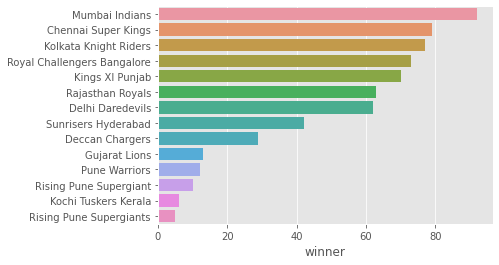

In [23]:
data = matches.winner.value_counts()
sns.barplot(y = data.index, x = data, orient='h');

**Top Batsmen in the Tournament**


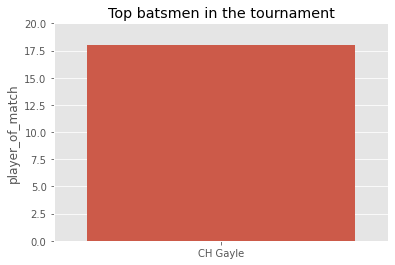

In [24]:
top_players = matches.player_of_match.value_counts()[:1]
fig, ax = plt.subplots()
ax.set_ylim([0,20])
ax.set_ylabel("Count")
ax.set_title("Top batsmen in the tournament")
sns.barplot(x = top_players.index, y = top_players, orient='v');
plt.show()

**Max Run Conceded Bowler**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


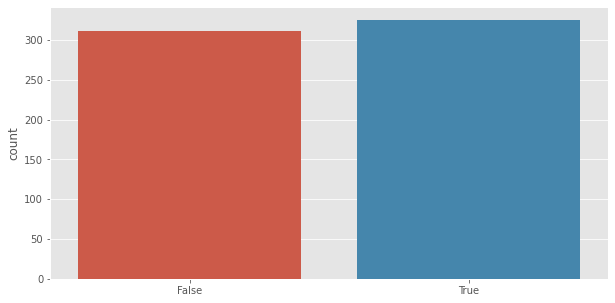

In [30]:
toss = matches['toss_winner'] == matches['winner']
plt.figure(figsize=(10,5))
sns.countplot(toss)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


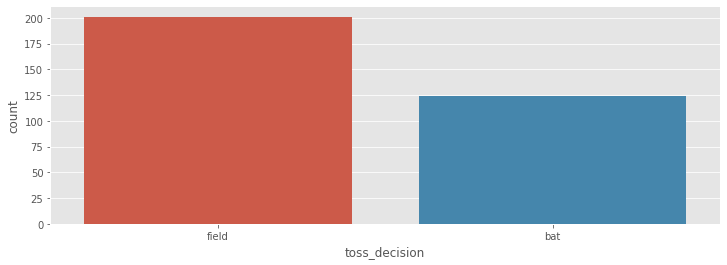

In [31]:
plt.figure(figsize=(12,4))
sns.countplot(matches.toss_decision[matches.toss_winner == matches.winner])

**Which season had most number of matches?**

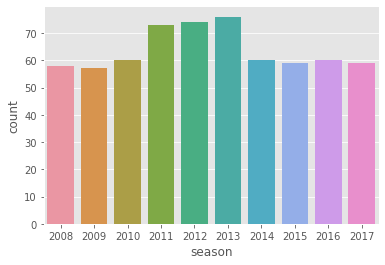

In [32]:
sns.countplot(x='season', data=matches)
plt.show()

**Top player of the match Winners**

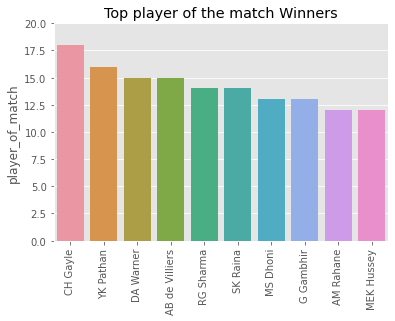

In [33]:
top_players = matches.player_of_match.value_counts()[:10]
fig, ax = plt.subplots()
ax.set_ylim([0,20])
ax.set_ylabel("Count")
top_players.plot.bar()
ax.set_title("Top player of the match Winners")
sns.barplot(x = top_players.index, y = top_players, orient='v');
plt.show()

**KMeans Clustering**

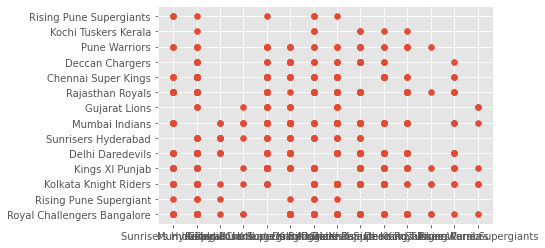

In [34]:
from matplotlib import style
style.use('ggplot')
from sklearn.cluster import KMeans
x = matches['team1']
y = matches['team2']
plt.scatter(x,y)